In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn 
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()

- CRIM 住房所在城鎮的人均犯罪率
- ZN 住房用地超過 25,000 平方尺的比例
- INDUS 住房所在城鎮非零售商用土地的比例
- CHAS 有關查理斯河的虛擬變數(如果住房位於河邊則為 1，否則為 0)
- NOX 一氧化氮濃度
- RM 每處住房的平均房間數
- AGE 建於 1940 年之前的業主自住房比例
- DIS 住房距離波士頓五大中心區域的加權距離
- RAD 距離住房最近的公路入口編號
- TAX 每 10,000 美元的全額財產稅金額
- PTRATIO 住房所在城鎮的師生比例
- B 1000(Bk-0.63)^2，其中 Bk 指代城鎮中黑人的比例
- LSTAT 弱勢群體人口所占比例
- MEDV 業主自住房的中位數房價(以千美元計)

In [61]:
data_df = pd.DataFrame(data=data.data,columns=data.feature_names)
data_df["MEDV"] = data.target
data_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [62]:
data_df.describe()
# 可以稍微檢查一下 類別型有沒有異常
# 百分比率 有沒有不合理
# 資料筆數是否相同

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### 檢查有無缺失值

In [71]:
data_df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [72]:
# to_numeric 將一列或多列轉為數值最佳方法，會嘗試將字串改為整數浮點，若不能轉換則為NAN
# astype 強行轉換
# infer_objects 推論轉換
data_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

C:\Users\adamw\AppData\Local\Temp\ipykernel_10272\3092774050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.target)


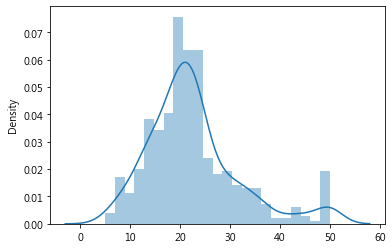

In [73]:
sns.distplot(data.target)
plt.show()

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

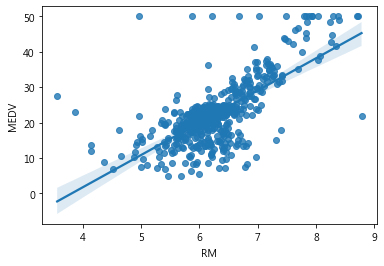

In [89]:
# regplot()：根據資料繪製線性迴歸(Linear Regression)模型圖
# 透過簡單線性回歸可看出 平數 與 房價 呈現正相關
sns.regplot(x=data_df["RM"], y=data_df["MEDV"])


<AxesSubplot:>

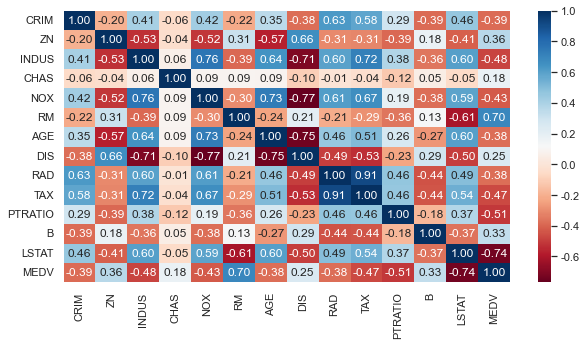

In [105]:
#透過皮爾森映射熱力圖看出哪些特徵與目標變數有較高的相關性。

sns.set(rc={"figure.figsize":(10,5)})
sns.heatmap(data=data_df.corr(),cmap="RdBu", #cmap="Greens"
 annot_kws={"size":12},
 annot=True,
 fmt=".2f")


元迴歸分析造成下列的不良影響：
1. 膨脹最小平方法（least squares）估計參數值的變異數和共變數，使得迴歸係數的
估計值變得很不精確。
2. 膨脹迴歸係數估計值的相關係數。
3. 膨脹預測值的變異數，但對預測能力不影響。
4. 造成解釋迴歸係數及其信賴區間估計之困難。
5. 造成整體模式的考驗達顯著，但各別迴歸係數之考驗不顯著的矛盾現象和解釋上
之困擾。
6. 造成迴歸係數的正負號與所期望者相反的衝突現象，這是由於自變項間之壓抑效
果（suppress effect）造成的。
一個比較簡單的診斷方法是察看自變項間的相關係數矩陣，看看該矩陣中是否
有元素值（即自變項兩兩之間的相關係數值）是大於.90 以上者，若有，即表示該二
變項互為「多元共線性變項」，並認為該迴歸分析中有嚴重的多元共線性問題存在。
另一個比較正式、客觀的診斷法，則為使用第 j 個自變項的「變異數膨脹因數」
（variance inflation factor）作為判斷的指標，凡變異數膨脹因數指標值大於 10 者，
即表示第 j 個自變項是一個多元共線性變項。
在一般的迴歸分析中，針對這種多元共線性問題，有些統計學家會建議將多元
共線性變項予以刪除，不納入迴歸方程式中。但避免多元共線性問題所造成困擾的
最佳解決方法，不是刪除該具有多元共線性變項，而是使用所謂的「偏差迴歸分析」
（biased regression analysis, BRA）。其中以「山脊型迴歸」（ridge regression）最受到
學者們的重視和使用；除此之外，尚有「主成分迴歸」（principal component
regression）、「潛在根迴歸」（latent root regression）、「貝氏法迴歸」（Baysean
regression）、「遞縮式迴歸」（shrinkage regression）等，不過這些偏差迴歸分析法所獲
得的迴歸係數值都是「有偏差的」（biased），亦即這些迴歸係數的期望值不等於母群
體的迴歸係數值，所以稱作偏差迴歸係數估計值，而本補救多元共線性問題的方法
即稱作偏差迴歸分析法。


In [ ]:
x = data_df.drop("MEDV",axis=1)
y = data_df["MEDV"]

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [178]:
reg = sklearn.linear_model.LinearRegression()
reg.fit(x_train,y_train)
print("訓練集score",reg.score(x_train,y_train))
print("訓練集score",reg.score(x_test,y_test))
np.set_printoptions(precision=3, suppress=True)
print("w權重",reg.coef_)
coef_df = pd.DataFrame(columns=x_train.columns,data=reg.coef_.reshape(1,13))
print(coef_df)
predict = reg.predict(x_test)
print(predict)
# 可以看出RM對於房價的影響是比較高的
# 負相關的部分可以思考一下為什麼，例如NOX(一氧化碳農度)可以看出對於房價是負影響，可能工業區或嚴重汙染地區

訓練集score 0.7645451026942549
訓練集score 0.6733825506400171
w權重 [ -0.121   0.044   0.011   2.511 -16.231   3.859  -0.01   -1.5     0.242
  -0.011  -1.018   0.007  -0.487]
      CRIM        ZN     INDUS      CHAS        NOX        RM       AGE  \
0 -0.12131  0.044466  0.011342  2.511246 -16.231253  3.859068 -0.009985   

       DIS       RAD       TAX   PTRATIO         B     LSTAT  
0 -1.50027  0.242143 -0.011072 -1.017753  0.006814 -0.486738  
[24.936 23.752 29.326 11.975 21.373 19.191 20.572 21.212 19.046 20.355
  5.441 16.937 17.155  5.393 40.203 32.313 22.462 36.501 31.037 23.171
 24.748 24.499 20.66  30.455 22.325 10.189 17.443 18.261 35.633 20.82
 18.272 17.72  19.338 23.623 28.978 19.45  11.132 24.818 18.053 15.597
 26.21  20.811 22.173 15.484 22.623 24.886 19.748 23.047  9.846 24.364
 21.478 17.621 24.392 29.951 13.572 21.536 20.533 15.034 14.323 22.119
 17.073 21.541 32.968 31.372 17.786 32.751 18.748 19.214 19.42  23.081
 22.877 24.064 30.528 28.715 25.908  5.176 36.871 23.77  27.

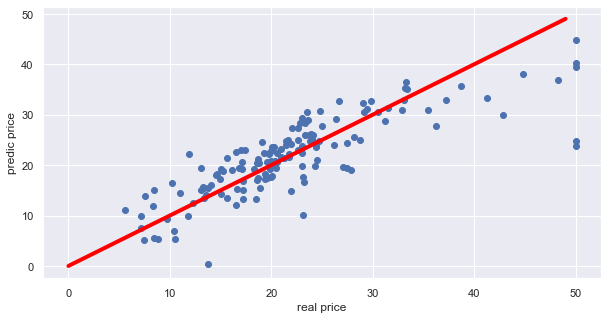

In [187]:
plt.scatter(y_test,predict)
plt.ylabel("predic price")
plt.xlabel("real price")
x = np.arange(0, 50)
y = x
plt.plot(x, y, color="red", lw=4)

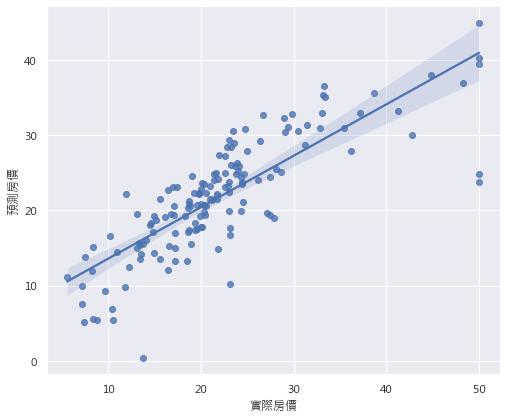

In [213]:
predict = pd.Series(predict)
#重新設定 index
y_test.reset_index(inplace=True, drop=True)
predict.reset_index(inplace=True, drop=True)
draw_data = pd.concat([y_test,predict],axis=1)
draw_data.columns = ["實際房價","預測房價"]
#用於正常顯示中文，Apple Mac 可選用 Arial
plt.rcParams["font.sans-serif"] = "Microsoft JhengHei"
#用於正常顯示符號
plt.rcParams["axes.unicode_minus"] = False
sns.lmplot(x="實際房價", y="預測房價",
 data=draw_data,
 height=6,
 aspect=1.2,
 ci=95)

In [217]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predict))
r2 = metrics.r2_score(y_test, predict)
print(mse)
print(rmse)
print(r2)
###
# 但依經驗歸納如下：R2的
# 值大於 0.75，表示迴歸模型擬合度很好，迴歸方程的可解釋程度較高，即迴歸方程的精度較
# 高。R2 的值在 0.5 和 0.75 之間，表示迴歸模型的擬合可以接受，但需要進一步修正迴歸模型。
# R2 的值小於 0.5，表示迴歸模型擬合有問題，

27.195965766883408
5.214975145375423
0.6733825506400171


### 重新調整線性迴歸使用的特徵數量

為甚麼「訓練模型的正確率」這麼低呢（正確率：0.7645451026942549）？因為線性迴
歸的的方程式為一條直線，當特徵與房價不成線性關係的話，那麼再怎麼分析，正確率都不
會高。解決的方法有：(1).只討論呈線性關係的特徵、(2).使用多項式迴歸、(3).降維。


In [ ]:
# 討論第三種方法降維
# 假定 變量數目浩繁，但只有少數幾個真正起作用 ，找出相關顯著的特徵
boston_house = load_boston()
boston_house_df = pd.DataFrame(data=boston_house.data,columns=boston_house.feature_names)
boston_house_df